.. meta::
   :description: A guide which introduces the most important steps to get started with pymoo, an open-source multi-objective optimization framework in Python.

.. meta::
   :keywords: Multi-objective Optimization, Python, Evolutionary Computation, Optimization Test Problem, Hypervolume

# Part I: A Constrained Bi-objective Optimization Problem

In the following, we investigate exemplarily a bi-objective optimization with two constraints. 
We have tried to select a suitable optimization problem with enough complexity for demonstration purposes, but not too difficult to lose track of the overall idea. Its definition is given by:

As already discussed in the Preface, let an optimization problem be defined by:

\begin{align}
\begin{split}
\min \quad& f_{m}(x) \quad \quad \quad \quad m = 1,..,M  \\[4pt]
\text{s.t.}   \quad& g_{j}(x) \leq 0  \quad \; \; \,  \quad j = 1,..,J \\[2pt]
\quad& h_{k}(x) = 0        \quad  \; \; \quad k = 1,..,K \\[4pt]
\quad& x_{i}^{L} \leq x_{i} \leq x_{i}^{U}  \quad i = 1,..,N \\[2pt]
\quad& x \in \Omega
\end{split}
\end{align}

The the example problem to be solved in this getting started guide is given by:

\begin{align} 
\begin{split}
\min \;\; & f_1(x) = 100 \,(x_1^2 + x_2^2) \\ 
\max \;\; & f_2(x) = -(x_1-1)^2 - x_2^2 \\[1mm]
\text{s.t.} \;\; & g_1(x) = 2 \, (x_1 - 0.1) \, (x_1 - 0.9) \leq 0\\ 
& g_2(x) = 20 \, (x_1 - 0.4) \, (x_1 - 0.6) \geq 0\\[1mm] 
& -2 \leq x_1 \leq 2 \\
& -2 \leq x_2 \leq 2\\[1mm] 
& x \in \mathbb{R}
\end{split}
\end{align}

The problem consists of two objectives ($M=2$) where $f_1(x)$ is minimized and $f_2(x)$ maximized. The optimization is subject to two inequality constraints ($J=2$) where $g_1(x)$ is formulated as a less than and $g_2(x)$ as a greater than constraint. The problem is defined with respect to two variables ($N=2$), $x_1$ and $x_2$, both in the range $[-2,2]$. The problem does not contain any equality constraints ($K=0$). 

Let us analyze where the Pareto-optimal solutions have to lie. The first objective $f_1$ is minimized at $(0,0)$, whereas the second object $f_2$ at $(1, 0)$. Because both functions are of quadratic nature, the optimum is given by a straight line between the two optima. This means all Pareto-optimal solutions (ignoring the constraints for now) have in common that $x_2=0$ and $x_1 \in (0,1)$. The first constraint only relies on $x_1$ and is satisfied if $x_1 \in (0.1,0.9)$. The second constraint $g_2$ is satisfied for $x_1 \in (0.4,0.6)$.
This means analytically, the pareto-optimal set is  given by $PS = \{(x_1, x_2) \,|\, (0.1 \leq x_1 \leq 0.4) \lor (0.6 \leq x_1 \leq 0.9) \, \land \, x_2 = 0\}$. 

The figure below shows the problem's functions in the design space and might help to see the relationship between the functions intuitively. The contour lines of the objective function $f_1(x)$ is represented by a solid and $f_2(x)$ by a dashed line. The constraints $g_1(x)$ and $g_2(x)$ are parabolas which intersect the $x_1$-axis at $(0.1, 0.9)$ and $(0.4, 0.6)$. A thick orange line illustrates the Pareto-optimal set. When considering both constraints together, the Pareto-set shown in orange is split into two parts as analytically derived above.

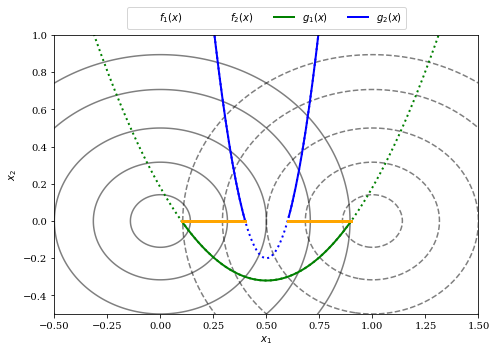

In [1]:
import numpy as np

X1, X2 = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))

F1 = X1**2 + X2**2
F2 = (X1-1)**2 + X2**2
G = X1**2 - X1 + 3/16

G1 = 2 * (X1[0] - 0.1) * (X1[0] - 0.9)
G2 = 20 * (X1[0] - 0.4) * (X1[0] - 0.6)


import matplotlib.pyplot as plt
plt.rc('font', family='serif')

levels = [0.02, 0.1, 0.25, 0.5, 0.8]
plt.figure(figsize=(7, 5))
CS = plt.contour(X1, X2, F1, levels, colors='black', alpha=0.5)
CS.collections[0].set_label("$f_1(x)$")

CS = plt.contour(X1, X2, F2, levels, linestyles="dashed", colors='black', alpha=0.5)
CS.collections[0].set_label("$f_2(x)$")

plt.plot(X1[0], G1, linewidth=2.0, color="green", linestyle='dotted')
plt.plot(X1[0][G1<0], G1[G1<0], label="$g_1(x)$", linewidth=2.0, color="green")

plt.plot(X1[0], G2, linewidth=2.0, color="blue", linestyle='dotted')
plt.plot(X1[0][X1[0]>0.6], G2[X1[0]>0.6], label="$g_2(x)$",linewidth=2.0, color="blue")
plt.plot(X1[0][X1[0]<0.4], G2[X1[0]<0.4], linewidth=2.0, color="blue")

plt.plot(np.linspace(0.1,0.4,100), np.zeros(100),linewidth=3.0, color="orange")
plt.plot(np.linspace(0.6,0.9,100), np.zeros(100),linewidth=3.0, color="orange")

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

Next, we derive the Pareto-front by mapping the Pareto-set to the objective space. The Pareto-front equation is based on $f_2$ depending on the variable of $f_1$. We know that at the optimum $x_2=0$ which means we can simplify the objective functions to $f_1(x) = 100 \; x_1^2$ and $f_2(x) = -(x_1-1)^2$. The first objective $f_1$ can be reformulated to $x_1 = \sqrt{\frac{f_1}{100}}$ and then be put into the second objective which results in

$$f_2 = -\left(\sqrt{\frac{f_1}{100}}-1\right)^2$$

The equation defines the shape, however, next all possible values for $f_1$ need to be defined. As shown before the Pareto-set is defined for $(0.1 \leq x_1 \leq 0.4) \lor (0.6 \leq x_1 \leq 0.9) \, \land \, x_2 = 0$.
If we plug in the values for $x_1$ into $f_1$ we get the points of interest $[1,16]$ and $[36,81]$.
Thus the Pareto-front is given by:

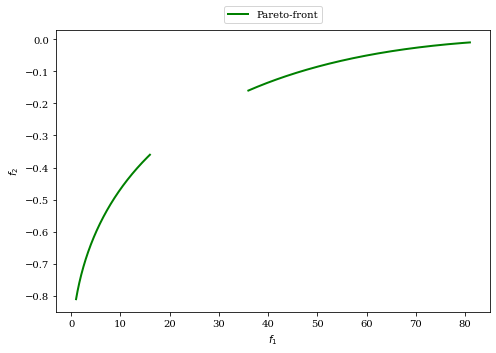

In [2]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

f2 = lambda f1: - ((f1/100) ** 0.5 - 1)**2
F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 300)
F2_a, F2_b = f2(F1_a), f2(F1_b)

plt.rc('font', family='serif')
plt.plot(F1_a,F2_a, linewidth=2.0, color="green", label="Pareto-front")
plt.plot(F1_b,F2_b, linewidth=2.0, color="green")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

As a quick check, we shall verify if this is a non-dominated set. Keeping in mind that the first objective is minimized and the second maximized for this optimization problem, a better solution lies on the top left. This means the derived Pareto-front makes sense. 